In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

# EDA

This is the EDA for combining all the different regions together, but JupyterHub kept crashing from memory / RAM issues. Deselected for now.

In [2]:
'''def eda(data):
    df = data.copy()
    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',
                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',
                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]
    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')
    df['day'] = df['Local date'].dt.day
    df['month'] = df['Local date'].dt.month
    df['year'] = df['Local date'].dt.year
    df['dotw'] = df['Local date'].dt.dayofweek
    df = df[df['year'] >= 2019]
    df['Hour'] = df['Hour'] - 1
    df = df[~((df['day'] == 18) & (df['month'] == 11) & (df['year'] == 2024))]
    df = df[~((df['day'] == 17) & (df['month'] == 11) & (df['year'] == 2024))]
    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')
    return df'''

"def eda(data):\n    df = data.copy()\n    df = df[['Region', 'UTC time', 'Local date', 'Hour', 'Local time', 'Time zone',\n                         'DF', 'D', 'Sum (NG)', 'NG: COL', 'NG: NG', 'NG: NUC',\n                         'NG: OIL', 'NG: WAT', 'NG: SUN', 'NG: WND', 'NG: OTH', 'CO2 Emissions Generated']]\n    df['Local date'] = pd.to_datetime(df['Local date'], format='%d%b%Y')\n    df['day'] = df['Local date'].dt.day\n    df['month'] = df['Local date'].dt.month\n    df['year'] = df['Local date'].dt.year\n    df['dotw'] = df['Local date'].dt.dayofweek\n    df = df[df['year'] >= 2019]\n    df['Hour'] = df['Hour'] - 1\n    df = df[~((df['day'] == 18) & (df['month'] == 11) & (df['year'] == 2024))]\n    df = df[~((df['day'] == 17) & (df['month'] == 11) & (df['year'] == 2024))]\n    df['D'] = pd.to_numeric(df['D'].str.replace(',', '', regex=False), errors='coerce')\n    return df"

In [3]:
'''california = eda(pd.read_csv('california.csv', low_memory=False))
carolinas = eda(pd.read_csv('carolinas.csv', low_memory=False))
central = eda(pd.read_csv('central.csv', low_memory=False))
florida = eda(pd.read_csv('florida.csv', low_memory=False))
mid_atlantic = eda(pd.read_csv('mid_atlantic.csv', low_memory=False))
midwest = eda(pd.read_csv('midwest.csv', low_memory=False))
new_york = eda(pd.read_csv('new_york.csv', low_memory=False))
northwest = eda(pd.read_csv('northwest.csv', low_memory=False))
northeast = eda(pd.read_csv('northeast.csv', low_memory=False))
southeast = eda(pd.read_csv('southeast.csv', low_memory=False))
southwest = eda(pd.read_csv('southwest.csv', low_memory=False))
tennessee = eda(pd.read_csv('tennessee.csv', low_memory=False))
texas = eda(pd.read_csv('texas.csv', low_memory=False))'''

"california = eda(pd.read_csv('california.csv', low_memory=False))\ncarolinas = eda(pd.read_csv('carolinas.csv', low_memory=False))\ncentral = eda(pd.read_csv('central.csv', low_memory=False))\nflorida = eda(pd.read_csv('florida.csv', low_memory=False))\nmid_atlantic = eda(pd.read_csv('mid_atlantic.csv', low_memory=False))\nmidwest = eda(pd.read_csv('midwest.csv', low_memory=False))\nnew_york = eda(pd.read_csv('new_york.csv', low_memory=False))\nnorthwest = eda(pd.read_csv('northwest.csv', low_memory=False))\nnortheast = eda(pd.read_csv('northeast.csv', low_memory=False))\nsoutheast = eda(pd.read_csv('southeast.csv', low_memory=False))\nsouthwest = eda(pd.read_csv('southwest.csv', low_memory=False))\ntennessee = eda(pd.read_csv('tennessee.csv', low_memory=False))\ntexas = eda(pd.read_csv('texas.csv', low_memory=False))"

In [4]:
'''all_data = [california, carolinas, central, florida, mid_atlantic, midwest, new_york, northwest, northeast,
            southeast, southwest, tennessee, texas]'''

'all_data = [california, carolinas, central, florida, mid_atlantic, midwest, new_york, northwest, northeast,\n            southeast, southwest, tennessee, texas]'

In [5]:
'''master = pd.concat(all_data, axis=0, ignore_index=True)
master'''

'master = pd.concat(all_data, axis=0, ignore_index=True)\nmaster'

In [6]:
# How to interpret this dataset:
# Region refers to the region of the United States classified by the US Energy Information Administration (13 different regions)
# UTC is just the univesal time in UTC
# Hour refers to the time of the data (in a 24 hour time). For example; 0 corresponds to midnight (12am). 13 corresponds to 1pm.
# DF stands for 'Demand Forecast', which the prediction (not ours) about the forecasted demand for the same time period 24 hours later (we may not need this)
# D stands for 'Demand', this is the useful information for the sake of our project; units for this are Megawats per hour
# NG stands for 'Net Generations'. Then each one correpsonds to how the energy was produced
master = pd.read_csv('ds102_master.csv', low_memory=False)
master

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,NG: OIL,NG: WAT,NG: SUN,NG: WND,NG: OTH,CO2 Emissions Generated,day,month,year,dotw
0,CAL,01Jan2019 9:00:00,2019-01-01,0,01Jan2019 1:00:00,Pacific,"26,940",26876.0,"18,423","1,778",...,89.0,"2,295",-22,"2,604",779,"5,341",1,1,2019,1
1,CAL,01Jan2019 10:00:00,2019-01-01,1,01Jan2019 2:00:00,Pacific,"25,922",25989.0,"17,613","1,765",...,89.0,"2,002",-22,"2,514",731,"5,174",1,1,2019,1
2,CAL,01Jan2019 11:00:00,2019-01-01,2,01Jan2019 3:00:00,Pacific,"25,159",25295.0,"17,235","1,743",...,88.0,"1,724",-25,"2,539",724,"5,115",1,1,2019,1
3,CAL,01Jan2019 12:00:00,2019-01-01,3,01Jan2019 4:00:00,Pacific,"24,700",24884.0,"17,147","1,727",...,90.0,"1,757",-25,"2,464",727,"5,084",1,1,2019,1
4,CAL,01Jan2019 13:00:00,2019-01-01,4,01Jan2019 5:00:00,Pacific,"24,699",24922.0,"17,553","1,747",...,91.0,"1,962",-26,"2,280",751,"5,245",1,1,2019,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
669859,TEX,17Nov2024 2:00:00,2024-11-16,19,16Nov2024 20:00:00,Central,"48,471",48916.0,"48,334","5,374",...,NaN,4.0,1,"23,626",0,"12,332",16,11,2024,5
669860,TEX,17Nov2024 3:00:00,2024-11-16,20,16Nov2024 21:00:00,Central,"47,212",48221.0,"47,849","4,919",...,NaN,4.0,0,"24,075",0,"11,658",16,11,2024,5
669861,TEX,17Nov2024 4:00:00,2024-11-16,21,16Nov2024 22:00:00,Central,"45,985",47231.0,"46,950","4,722",...,NaN,4.0,0,"23,925",0,"11,213",16,11,2024,5
669862,TEX,17Nov2024 5:00:00,2024-11-16,22,16Nov2024 23:00:00,Central,"44,739",45799.0,"45,592","4,814",...,NaN,4.0,0,"23,976",0,"10,681",16,11,2024,5


# Quantitative Data (1)

In [7]:
demand_by_hour = master[['Hour', 'D']].groupby('Hour').mean()
demand_by_hour = demand_by_hour.drop(demand_by_hour.index[-1])

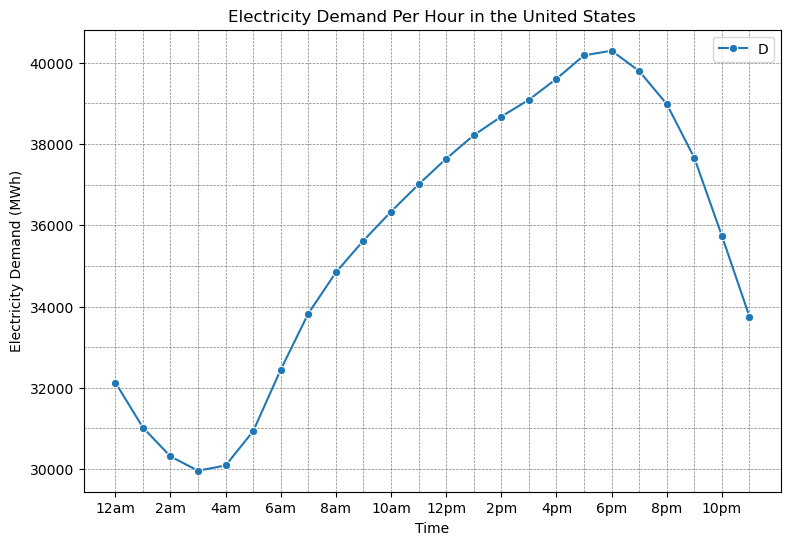

In [8]:
fig, ax = plt.subplots(figsize=(9, 6))
for y in np.arange(30000, 40000 + 1, 1000):
    plt.axhline(y=y, color='gray', linestyle='--', linewidth=0.5)
for x in np.arange(0, 23 + 1, 1):
    plt.axvline(x=x, color='gray', linestyle='--', linewidth=0.5)
plt.xticks(np.arange(0, 24, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
sns.lineplot(data=demand_by_hour, markers=True)
plt.xlabel('Time')
plt.ylabel('Electricity Demand (MWh)')
plt.title('Electricity Demand Per Hour in the United States');

Relevant to research question: Do time-based features predict hourly electricity demand?
There seems to be a gradual incline in terms of electricity demand throughout the day. There is peak deamand at 6pm and minimal demand at 3am, which makes sense and alligns with the traditional schedule of when Americans are awake. There does appear to be trend in terms of how much demand there at each hour of the day. This suggests that we could potentially predict electric demand. We will apply a generalized linear model to see if it fits any of the models.

In [9]:
demand_by_day = master[['dotw', 'D']].groupby('dotw').mean()
demand_by_day

,D
dotw,
0,36064.774981
1,36386.162000
2,36396.994634
3,36288.949031
4,35908.536927
5,34245.007131
6,33832.176967


# Categorical / Quantitative Graph

In [10]:
monthly_heatmap_data = master.groupby(['month', 'Hour'])['D'].mean().unstack()
monthly_heatmap_data = monthly_heatmap_data.drop(columns=[24], axis=1)
monthly_heatmap_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
month,,,,,,,,,,,,,,,,,,,,,
1,33321.736973,32767.422663,32536.466088,32593.314309,33100.388337,34380.985112,36491.771712,38134.520265,38584.530604,38275.355666,...,35866.926799,35851.097188,36449.967328,37984.138131,39076.632754,38947.747312,38342.499173,37290.971050,35834.645161,34429.263441
2,32429.066968,31870.348869,31642.523529,31702.711312,32208.367421,33513.012670,35681.467873,37188.257466,37440.373756,37051.352941,...,34805.867421,34774.102262,35204.039819,36267.842081,37562.251584,37780.189593,37222.089593,36199.078281,34758.573303,33355.700452
3,29611.177006,28915.739041,28560.755997,28519.553763,28925.261787,30086.867246,32049.040529,33499.434657,33942.631927,33858.933830,...,32761.667494,32740.040116,32990.075269,33502.136476,34133.969810,34661.902399,34651.869313,33700.924731,32188.082299,30621.823103
4,28107.333333,27208.087607,26687.564957,26490.130769,26740.928632,27676.890171,29281.425641,30538.251709,31250.736325,31623.126068,...,32614.041026,32833.793162,33194.316239,33575.354701,33703.728632,33758.391880,33872.881197,33027.167094,31312.457692,29561.032479
5,29643.547560,28377.469810,27542.419768,27081.420596,27091.110422,27740.440860,28902.937965,30145.032672,31378.957403,32473.793631,...,36911.983044,37481.005790,37988.309347,38277.065757,38056.806038,37400.569479,36840.243590,35800.563275,33802.145575,31576.152192
6,34110.588034,32381.368803,31153.116239,30382.329487,30149.885897,30538.341453,31406.445299,32896.345726,34780.970940,36702.156838,...,44680.638462,45479.300427,46055.254701,46250.208547,45764.770513,44589.574786,43182.056410,41662.375214,39330.989744,36634.260684
7,37730.398677,35799.325476,34373.552523,33422.203888,33041.460711,33337.858974,34074.121175,35448.155914,37553.370554,39905.586022,...,49833.804384,50714.269644,51291.127378,51377.951199,50776.444169,49315.059967,47578.265095,45741.110008,43164.667907,40296.453267
8,36990.174524,35216.024400,33914.741108,33069.026882,32794.230356,33288.114557,34296.124483,35418.725393,37190.639371,39300.810587,...,49095.206782,50018.278329,50593.177833,50641.282051,49864.693548,48355.780811,46804.316377,44801.311828,42045.236146,39225.573201
9,32485.043162,31057.842308,30062.200855,29461.029060,29370.293162,30018.602991,31316.179060,32419.903419,33628.297863,35122.851709,...,42490.419658,43361.252991,43959.060684,44034.908120,43288.641026,42268.758120,41074.903419,39088.527350,36643.794872,34278.227778


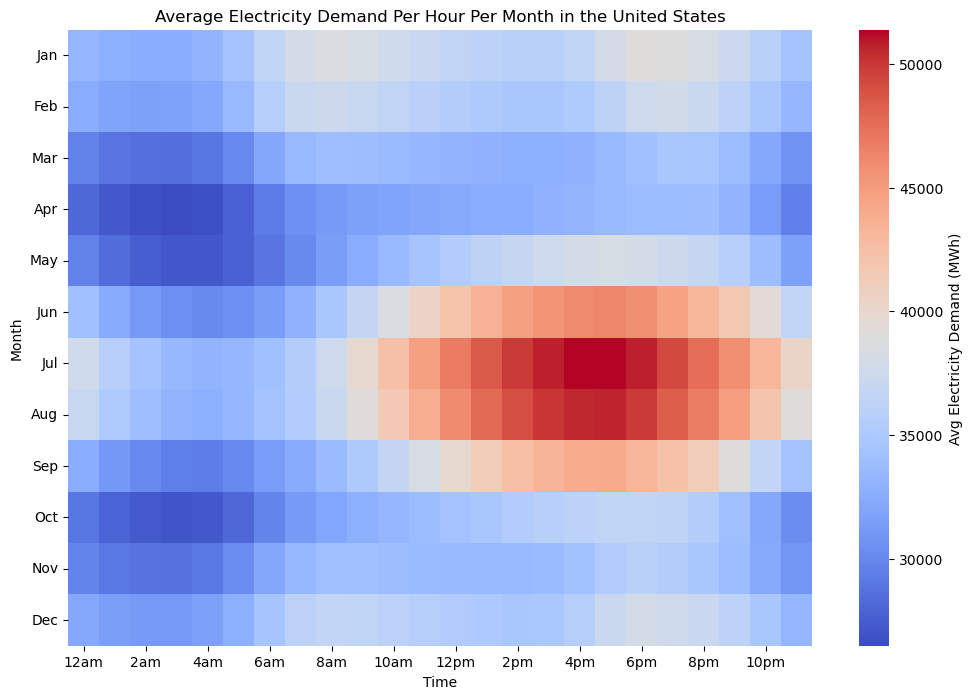

In [11]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=monthly_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Electricity Demand (MWh)'})
plt.xticks(np.arange(0.5, 24.5, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.yticks(np.arange(0.5, 12.5, 1), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.yticks(rotation=0)
plt.xlabel('Time')
plt.ylabel('Month')
plt.title('Average Electricity Demand Per Hour Per Month in the United States');

Research Question:  Do time-based features predict hourly electricity demand? We are looking at months of year. It gets hot in the summertime, so time to start pumping up the AC and keep the house cool. Demand seems to be lowered during the Fall and Spring seaons (particularly October and April). Why? Maybe cause we don't necessarily need cooling or heating. It's just the right temperature for anyone to complain. Demand does spike a little in the winter, but not as much as I had anticipated. Timing in months defineitelty correlates to electric demand.

# Categorical / Quantitative

In [12]:
weekly_heatmap_data = master.groupby(['dotw', 'Hour'])['D'].mean().unstack()
weekly_heatmap_data = weekly_heatmap_data.drop(columns=[24], axis=1)
weekly_heatmap_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
dotw,,,,,,,,,,,,,,,,,,,,,
0,31411.185772,30417.995224,29819.048265,29595.574661,29916.892408,31093.526898,33038.192056,34680.073404,35696.418552,36423.373052,...,39514.600050,39899.982906,40384.095023,40993.723479,41174.747612,40662.686275,39796.685520,38322.907240,36190.825038,34044.152338
1,32380.853170,31271.353796,30576.304435,30267.374092,30516.862440,31644.615635,33614.792032,35215.526434,36095.792784,36672.039339,...,39602.804560,40004.704836,40513.531947,41102.482335,41242.800802,40761.157605,39915.931095,38470.482836,36353.150589,34216.150589
2,32544.827612,31417.300927,30705.806815,30375.129291,30597.486845,31690.665998,33632.181408,35208.663493,36081.106740,36645.014533,...,39616.037083,40032.649962,40540.520170,41097.601854,41203.814082,40695.244801,39842.028314,38411.784766,36302.831120,34162.757955
3,32483.278376,31351.372338,30629.010524,30293.143072,30508.629667,31588.593335,33493.955650,35070.233525,35986.239288,36601.202456,...,39551.828614,39930.363819,40397.145076,40881.881233,40936.329992,40423.504635,39599.797043,38219.528940,36190.053871,34132.320220
4,32436.974944,31295.871962,30561.950639,30212.919820,30396.811325,31390.186921,33159.606364,34696.695314,35698.385117,36409.824355,...,39179.283137,39505.606114,39899.638186,40283.360060,40143.732899,39463.360812,38580.052117,37355.010524,35640.595590,33781.141569
5,32153.698572,30987.080180,30210.129792,29751.337760,29632.925833,29926.417940,30565.935355,31502.473816,32727.702330,33855.873465,...,36825.137560,37259.192182,37806.194688,38397.347281,38516.290905,38029.318968,37288.514157,36201.107993,34669.387372,32981.863693
6,31496.588738,30405.349925,29670.379085,29216.448718,29046.009050,29198.299397,29637.376571,30418.065862,31598.268225,32747.585973,...,36434.010809,36986.048265,37691.037959,38512.769482,38850.616390,38529.838361,37858.384364,36640.975365,34829.530166,32942.591398


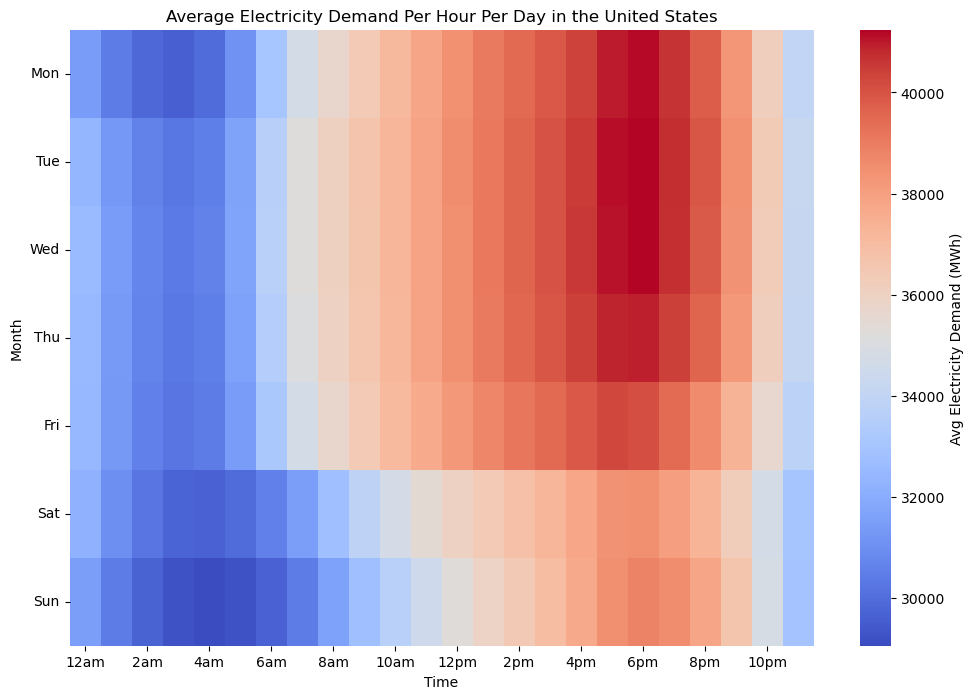

In [13]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=weekly_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Electricity Demand (MWh)'})
plt.xticks(np.arange(0.5, 24.5, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.yticks(np.arange(0.5, 7.5, 1), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.yticks(rotation=0)
plt.xlabel('Time')
plt.ylabel('Month')
plt.title('Average Electricity Demand Per Hour Per Day in the United States');

Research Question:  Do time-based features predict hourly electricity demand? There is a notable difference between weekdays and weekends. There is much less demand for electricity on weekends than on weekdays. Why? Most people work their 8-5 jobs during that time. Most people are going home at that time and making dinner, consuming media (this is all just a guess though). We can take into account the days of the week when preciting the demand forecast since it makes quite the differnce. Maybe people are getting up later on the weekends and not using as much electricity.

# Categorical / Quantitative

In [14]:
ian_spet = master[(master['Region'] == 'FLA') & (master['year'] == 2022) & (master['month'] == 9) & (master['day'] >= 22)]
ian_oct =  master[(master['Region'] == 'FLA') & (master['year'] == 2022) & (master['month'] == 10) & (master['day'] <= 5)]
ian = pd.concat([ian_spet, ian_oct], axis=0, ignore_index=True)
ian['Local date'] = pd.to_datetime(ian['Local date'])
ian['doy'] = ian['Local date'].dt.dayofyear
ian

,Region,UTC time,Local date,Hour,Local time,Time zone,DF,D,Sum (NG),NG: COL,...,NG: WAT,NG: SUN,NG: WND,NG: OTH,CO2 Emissions Generated,day,month,year,dotw,doy
0,FLA,22Sep2022 5:00:00,2022-09-22,0,22Sep2022 1:00:00,Eastern,"25,519",27592.0,"26,855","2,222",...,24.0,0,NaN,"3,617","9,339",22,9,2022,3,265
1,FLA,22Sep2022 6:00:00,2022-09-22,1,22Sep2022 2:00:00,Eastern,"24,232",25717.0,"25,075","1,934",...,23.0,0,NaN,"3,586","8,495",22,9,2022,3,265
2,FLA,22Sep2022 7:00:00,2022-09-22,2,22Sep2022 3:00:00,Eastern,"23,180",24475.0,"23,821","1,791",...,24.0,0,NaN,"3,487","7,967",22,9,2022,3,265
3,FLA,22Sep2022 8:00:00,2022-09-22,3,22Sep2022 4:00:00,Eastern,"22,671",23699.0,"23,040","1,696",...,24.0,0,NaN,"3,355","7,664",22,9,2022,3,265
4,FLA,22Sep2022 9:00:00,2022-09-22,4,22Sep2022 5:00:00,Eastern,"22,710",23568.0,"22,861","1,689",...,23.0,0,NaN,"3,296","7,621",22,9,2022,3,265
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
331,FLA,06Oct2022 0:00:00,2022-10-05,19,05Oct2022 20:00:00,Eastern,"30,899",33157.0,"32,477","2,424",...,12.0,121,NaN,"3,021","11,532",5,10,2022,2,278
332,FLA,06Oct2022 1:00:00,2022-10-05,20,05Oct2022 21:00:00,Eastern,"29,382",31876.0,"31,405","2,268",...,11.0,71,NaN,"2,888","11,044",5,10,2022,2,278
333,FLA,06Oct2022 2:00:00,2022-10-05,21,05Oct2022 22:00:00,Eastern,"27,658",29645.0,"29,127","2,225",...,12.0,72,NaN,"2,389","10,307",5,10,2022,2,278
334,FLA,06Oct2022 3:00:00,2022-10-05,22,05Oct2022 23:00:00,Eastern,"25,079",26754.0,"26,256","2,161",...,12.0,72,NaN,"1,796","9,371",5,10,2022,2,278


In [15]:
ian_heatmap_data = ian.groupby(['doy', 'Hour'])['D'].mean().unstack()
ian_heatmap_data

Hour,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
doy,,,,,,,,,,,,,,,,,,,,,
265,27592.0,25717.0,24475.0,23699.0,23568.0,24512.0,26471.0,27093.0,28887.0,31785.0,...,44877.0,46092.0,46408.0,45955.0,44345.0,42321.0,40476.0,37600.0,34135.0,31097.0
266,28371.0,26346.0,24837.0,23960.0,23748.0,24691.0,26526.0,27449.0,29225.0,32209.0,...,45023.0,45456.0,45430.0,44281.0,42082.0,39961.0,38191.0,35879.0,33457.0,30949.0
267,28447.0,26467.0,25043.0,24115.0,23563.0,23528.0,23891.0,24567.0,26983.0,30245.0,...,41152.0,41557.0,41311.0,40662.0,39071.0,37379.0,35835.0,33668.0,31392.0,29010.0
268,26729.0,24916.0,23626.0,22740.0,22227.0,22109.0,22571.0,23061.0,25694.0,29199.0,...,42240.0,43435.0,44078.0,43806.0,42039.0,40256.0,38875.0,36245.0,33424.0,30582.0
269,27996.0,26125.0,24921.0,24251.0,24201.0,25138.0,26707.0,27613.0,29192.0,32063.0,...,43728.0,43853.0,43337.0,41794.0,39969.0,38733.0,37133.0,34863.0,31904.0,29407.0
270,26913.0,25196.0,23900.0,23501.0,23196.0,24084.0,25805.0,26825.0,27703.0,29092.0,...,33872.0,34067.0,33934.0,33714.0,33233.0,33183.0,32260.0,30729.0,28809.0,26802.0
271,24891.0,23538.0,22656.0,22081.0,22065.0,22558.0,23673.0,24724.0,26340.0,28170.0,...,28696.0,28112.0,27448.0,26783.0,26181.0,26076.0,25424.0,24161.0,22583.0,21032.0
272,19583.0,18456.0,17577.0,17012.0,16803.0,16954.0,17411.0,18028.0,19017.0,20293.0,...,24297.0,24579.0,24796.0,24913.0,24758.0,24856.0,24342.0,22878.0,21187.0,19227.0
273,17459.0,16106.0,15367.0,14933.0,14878.0,15505.0,16736.0,17692.0,19039.0,20419.0,...,27810.0,29203.0,30206.0,30501.0,29656.0,28763.0,27816.0,26067.0,24203.0,22285.0


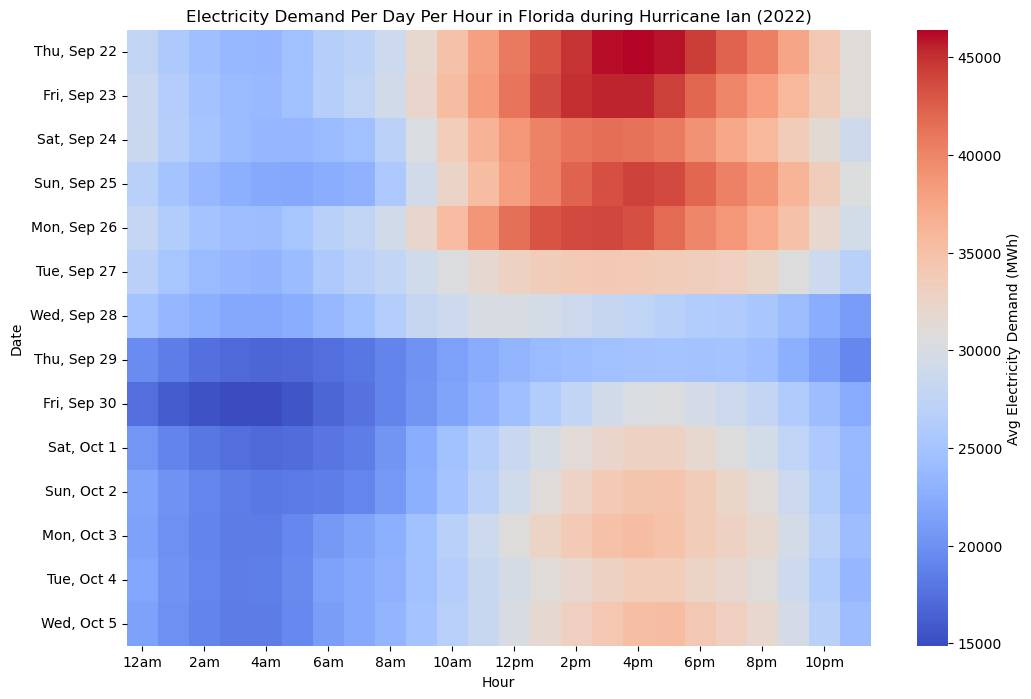

In [16]:
plt.figure(figsize=(12, 8))
sns.heatmap(data=ian_heatmap_data, cmap='coolwarm', cbar_kws={'label': 'Avg Electricity Demand (MWh)'})
plt.yticks(np.arange(0.5, 14.5, 1), ['Thu, Sep 22', 'Fri, Sep 23', 'Sat, Sep 24', 'Sun, Sep 25', 'Mon, Sep 26', 'Tue, Sep 27',
                                     'Wed, Sep 28', 'Thu, Sep 29', 'Fri, Sep 30', 'Sat, Oct 1', 'Sun, Oct 2', 'Mon, Oct 3',
                                    'Tue, Oct 4', 'Wed, Oct 5'])
plt.yticks(rotation=0)
plt.xticks(np.arange(0.5, 24.5, 2), ['12am', '2am', '4am', '6am', '8am', '10am', '12pm', '2pm', '4pm', '6pm', '8pm', '10pm'])
plt.ylabel('Date')
plt.title('Electricity Demand Per Day Per Hour in Florida during Hurricane Ian (2022)');

Research Question: How do extreme weather events impact daily electricity demand? We took a subset of the graph and limited to the region where Hurricane Ian created havoc in 2022. From inspection alone, you can see what day the hurricane hit (the line of blue). I included a few days before the impact to show how "normal" demand is supposed to be. And even after the hurricane, you can see trends started to back to normal, however not the extent to where it was week before. There is still some recovery occuring from the hurricane. You can see on the day of the hurricane there is notable difference. This will help us determine the casuality between whether phenomenon and electric demand.

# Categorical Graph

In [17]:
daily = master.groupby(['Region', 'year', 'month', 'day']).sum().reset_index()[['Region', 'year', 'month', 'day', 'D']]
daily

,Region,year,month,day,D
0,CAL,2019,1,1,646739.0
1,CAL,2019,1,2,713041.0
2,CAL,2019,1,3,723967.0
3,CAL,2019,1,4,715678.0
4,CAL,2019,1,5,706611.0
...,...,...,...,...,...
27906,TEX,2024,11,12,1144137.0
27907,TEX,2024,11,13,1151617.0
27908,TEX,2024,11,14,1086668.0
27909,TEX,2024,11,15,1079797.0


/tmp/ipykernel_98/4286068006.py:3: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(['California', 'Carolinas', 'Central', 'Florida', 'Mid-Atlantic', 'Midwest', 'Northeast', 'Northwest', 'New York',


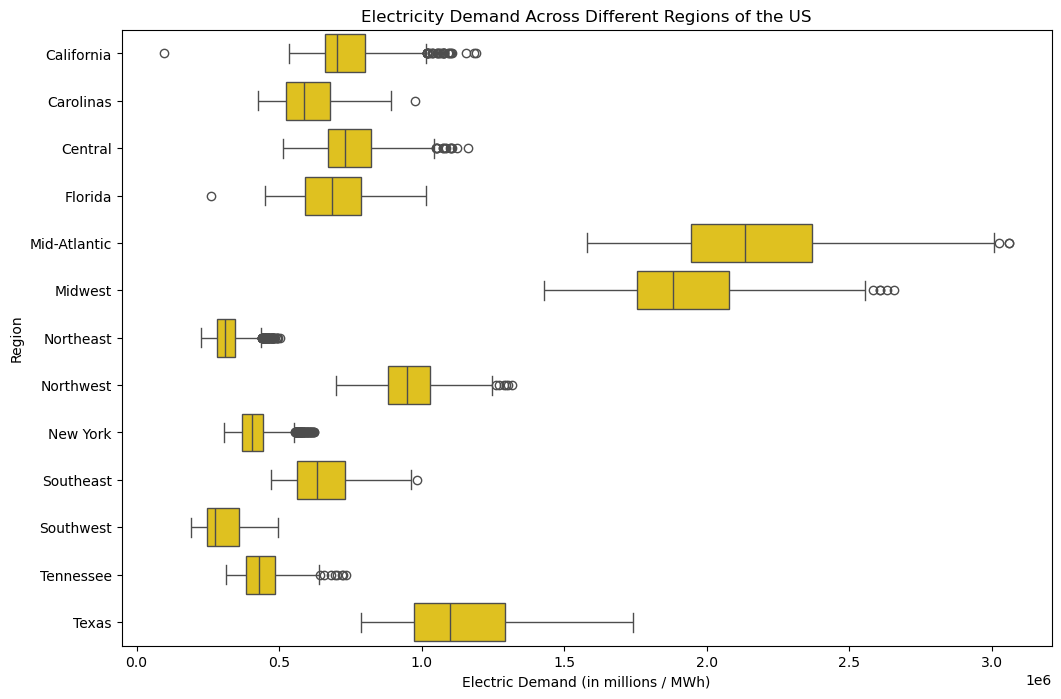

In [18]:
plt.figure(figsize=(12, 8))
ax = sns.boxplot(data=daily, x='D', y='Region', color="gold")
ax.set_yticklabels(['California', 'Carolinas', 'Central', 'Florida', 'Mid-Atlantic', 'Midwest', 'Northeast', 'Northwest', 'New York',
                   'Southeast', 'Southwest', 'Tennessee', 'Texas'])
plt.xlabel('Electric Demand (in millions / MWh)')
plt.title('Electricity Demand Across Different Regions of the US')
plt.show()

Research Question: How do extreme weather events impact daily electricity demand? Altough this does not directly answer our question, it is crucial to have this data as our background knowledge. Different regions of the US demand various amounts of electricity. There are some regions that I was not expecting to have as much demand. I persoanlly thought it would have been correlated to the amount of people living in those regions, but regions like California and New York are not drviing up demand. What did surprise me was how much electricity the Mid-Atlantic and Midwest regions demands. They **significantly** have more demand than other regions. Why? I'm not sure yet, but we might get more insight into this. Knowing the baselines of the different regions will be important when we compare time period where there is significant weather events going on.